<a href="https://colab.research.google.com/github/JayNguyen-123/Taxi-Fare-/blob/main/TaxiFare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/taxi-fares.csv')
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00 UTC,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00 UTC,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,1


In [ ]:
df.shape

(55368, 8)

In [ ]:
df.info()
df = df[df['passenger_count'] == 1]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                55368 non-null  object 
 1   fare_amount        55368 non-null  float64
 2   pickup_datetime    55368 non-null  object 
 3   pickup_longitude   55368 non-null  float64
 4   pickup_latitude    55368 non-null  float64
 5   dropoff_longitude  55368 non-null  float64
 6   dropoff_latitude   55368 non-null  float64
 7   passenger_count    55368 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


In [ ]:
df = df.drop(['key', 'passenger_count'], axis=1)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065


In [ ]:
df.shape


(38233, 6)

In [ ]:
import datetime
from math import sqrt

for i, row in df.iterrows():
  dt = datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S UTC')
  df.at[i, 'day_of_week'] = dt.weekday()
  df.at[i, 'pickup_time'] = dt.hour

  x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6  # 1 x-axis degree == 56.4 miles
  y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0 # 1 y-axis degree == 69 miles
  distance = sqrt(x**2 + y**2)
  df.at[i, 'distance'] = distance

df.head()



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [ ]:
# Remove column no longer needed.
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()



,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [ ]:
df.describe()


,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [ ]:
""" Dataset contains outliers. Filter the dataset eliminating negative fare amounts and placing reasonable limits on fares and distance"""
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.shape


(23298, 4)

In [ ]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)


,fare_amount
fare_amount,1.000000
distance,0.851913
day_of_week,-0.003570
pickup_time,-0.023085


In [ ]:
# Build the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,217 (1.01 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Extract the feature columns and the labels column
x = df.drop('fare_amount', axis=1)
y= df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)


Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 3.9740 - mae: 3.9740 - val_loss: 2.3702 - val_mae: 2.3702
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.4068 - mae: 2.4068 - val_loss: 2.5120 - val_mae: 2.5120
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3847 - mae: 2.3847 - val_loss: 2.4538 - val_mae: 2.4538
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4125 - mae: 2.4125 - val_loss: 2.3497 - val_mae: 2.3497
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.3618 - mae: 2.3618 - val_loss: 2.3850 - val_mae: 2.3850
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.3584 - mae: 2.3584 - val_loss: 2.3581 - val_mae: 2.3581
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.3353 - mae: 2.3353 - val_loss: 2.3366 - val_mae: 2.3366
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.3519 - mae: 2.3519 - val_loss: 2.3354 - val_mae: 2.3354
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s

[]

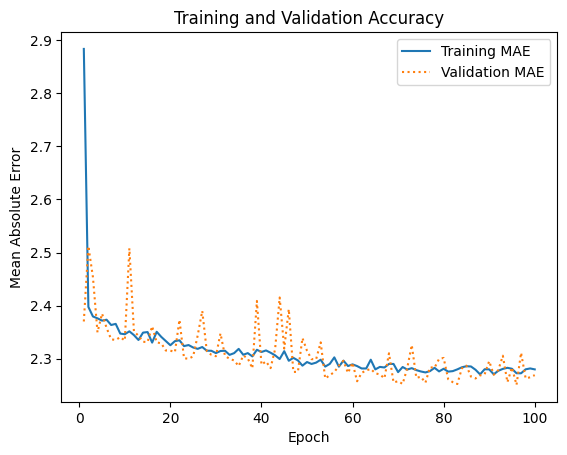

In [ ]:
import matplotlib.pyplot as plt
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, model.predict(x))



729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


0.7461927037139733

In [ ]:

# estimate what it will cost to catch a taxi for a 2-mile trip at 5:00 p.m. on Friday afternoon.
import numpy as np
model.predict(np.array([[4, 17, 2.0]]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[10.802172]], dtype=float32)

In [ ]:
# try predict the fare amount for a 2-mile trip taken at 5:00 p.m. one day later (on Saturday).
model.predict(np.array([[5, 17, 2.0]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[10.61132]], dtype=float32)